# KMeans and the Iris dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

Load the iris dataset.

In [2]:
X, y = load_iris().data, load_iris().target

Fit the model.

In [3]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [4]:
model.cluster_centers_

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

In [5]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [6]:
model.score(X)

-78.940841426145994

Let's look how the clusters are defined in a plot

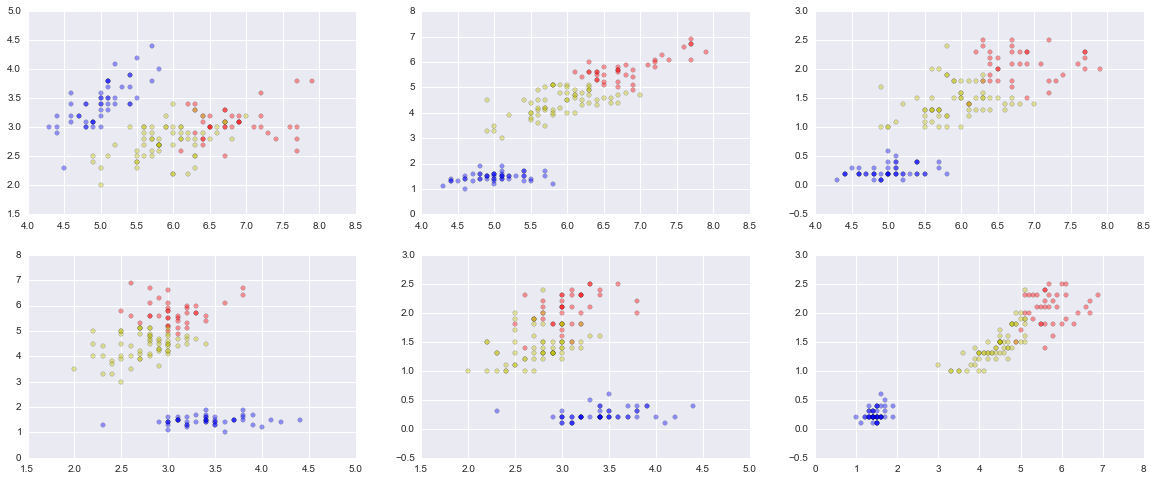

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
clusters = range(3)
colors = list("rby")
pred = model.predict(X)
i = 0
for x1 in xrange(4):
    for x2 in xrange(x1 + 1, 4):
        for cluster in clusters:
            A = X[pred == cluster]
            axes[i / 3][i % 3].scatter(A[:, x1], A[:, x2], c=colors[cluster], alpha=.4)
        i += 1

Let's look how 'pure' these clusters are.

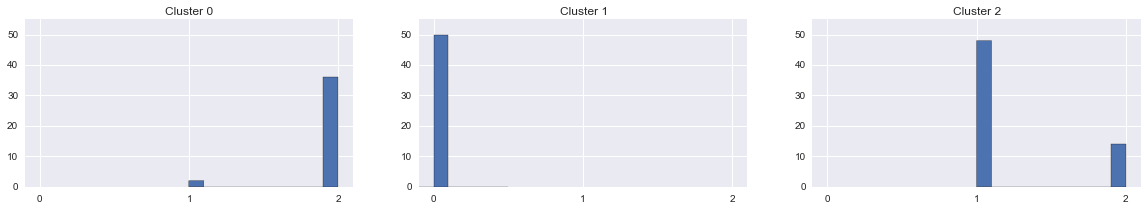

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 3))
for i, cluster in enumerate(clusters):
    axes[i].hist(y[pred == cluster])
    axes[i].set_title("Cluster %d" % cluster), 
    axes[i].set_xlim(-.1, 2.1), axes[i].set_xticks(range(3)), axes[i].set_ylim(0, 55)